Количество пропущенных значений:
 age       50
sex       50
bmi       50
bp        50
s1        50
s2        50
s3        50
s4        50
s5        50
s6        50
target    50
dtype: int64


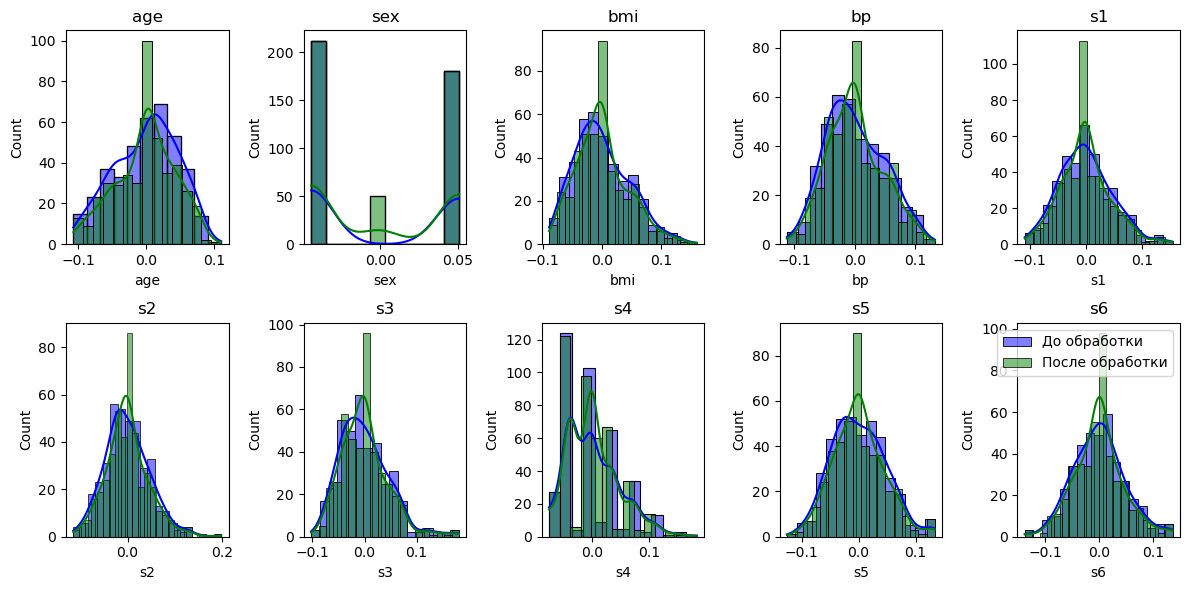

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.impute import SimpleImputer

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
feature_names = diabetes.feature_names

df = pd.DataFrame(data=X, columns=feature_names)
df['target'] = y

np.random.seed(42)
missing_indices = np.random.choice(range(df.shape[0]), size=50, replace=False)
for col in df.columns:
    df.loc[missing_indices, col] = np.nan

missing_values = df.isnull().sum()
print("Количество пропущенных значений:\n", missing_values)

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(df.drop(columns=['target']))

df_imputed = pd.DataFrame(data=X_imputed, columns=feature_names)

plt.figure(figsize=(12, 6))

for i, feature in enumerate(feature_names):
    plt.subplot(2, 5, i+1)
    sns.histplot(df[feature], color='blue', kde=True, label='До обработки', alpha=0.5)
    sns.histplot(df_imputed[feature], color='green', kde=True, label='После обработки', alpha=0.5)
    plt.title(feature)

plt.tight_layout()
plt.legend()
plt.show()


In [68]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

data = pd.DataFrame({
    'gender': ['Male', 'Female', 'Female', 'Male', 'Female'],
    'city': ['Moscow', 'Paris', 'London', 'New York', 'Tokyo'],
    'age': [30, 25, 35, 40, 45]
})

encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(data[['gender', 'city']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['gender', 'city']))
final_df = pd.concat([encoded_df, data[['age']]], axis=1)
print(final_df)


   gender_Female  gender_Male  city_London  city_Moscow  city_New York  \
0            0.0          1.0          0.0          1.0            0.0   
1            1.0          0.0          0.0          0.0            0.0   
2            1.0          0.0          1.0          0.0            0.0   
3            0.0          1.0          0.0          0.0            1.0   
4            1.0          0.0          0.0          0.0            0.0   

   city_Paris  city_Tokyo  age  
0         0.0         0.0   30  
1         1.0         0.0   25  
2         0.0         0.0   35  
3         0.0         0.0   40  
4         0.0         1.0   45  


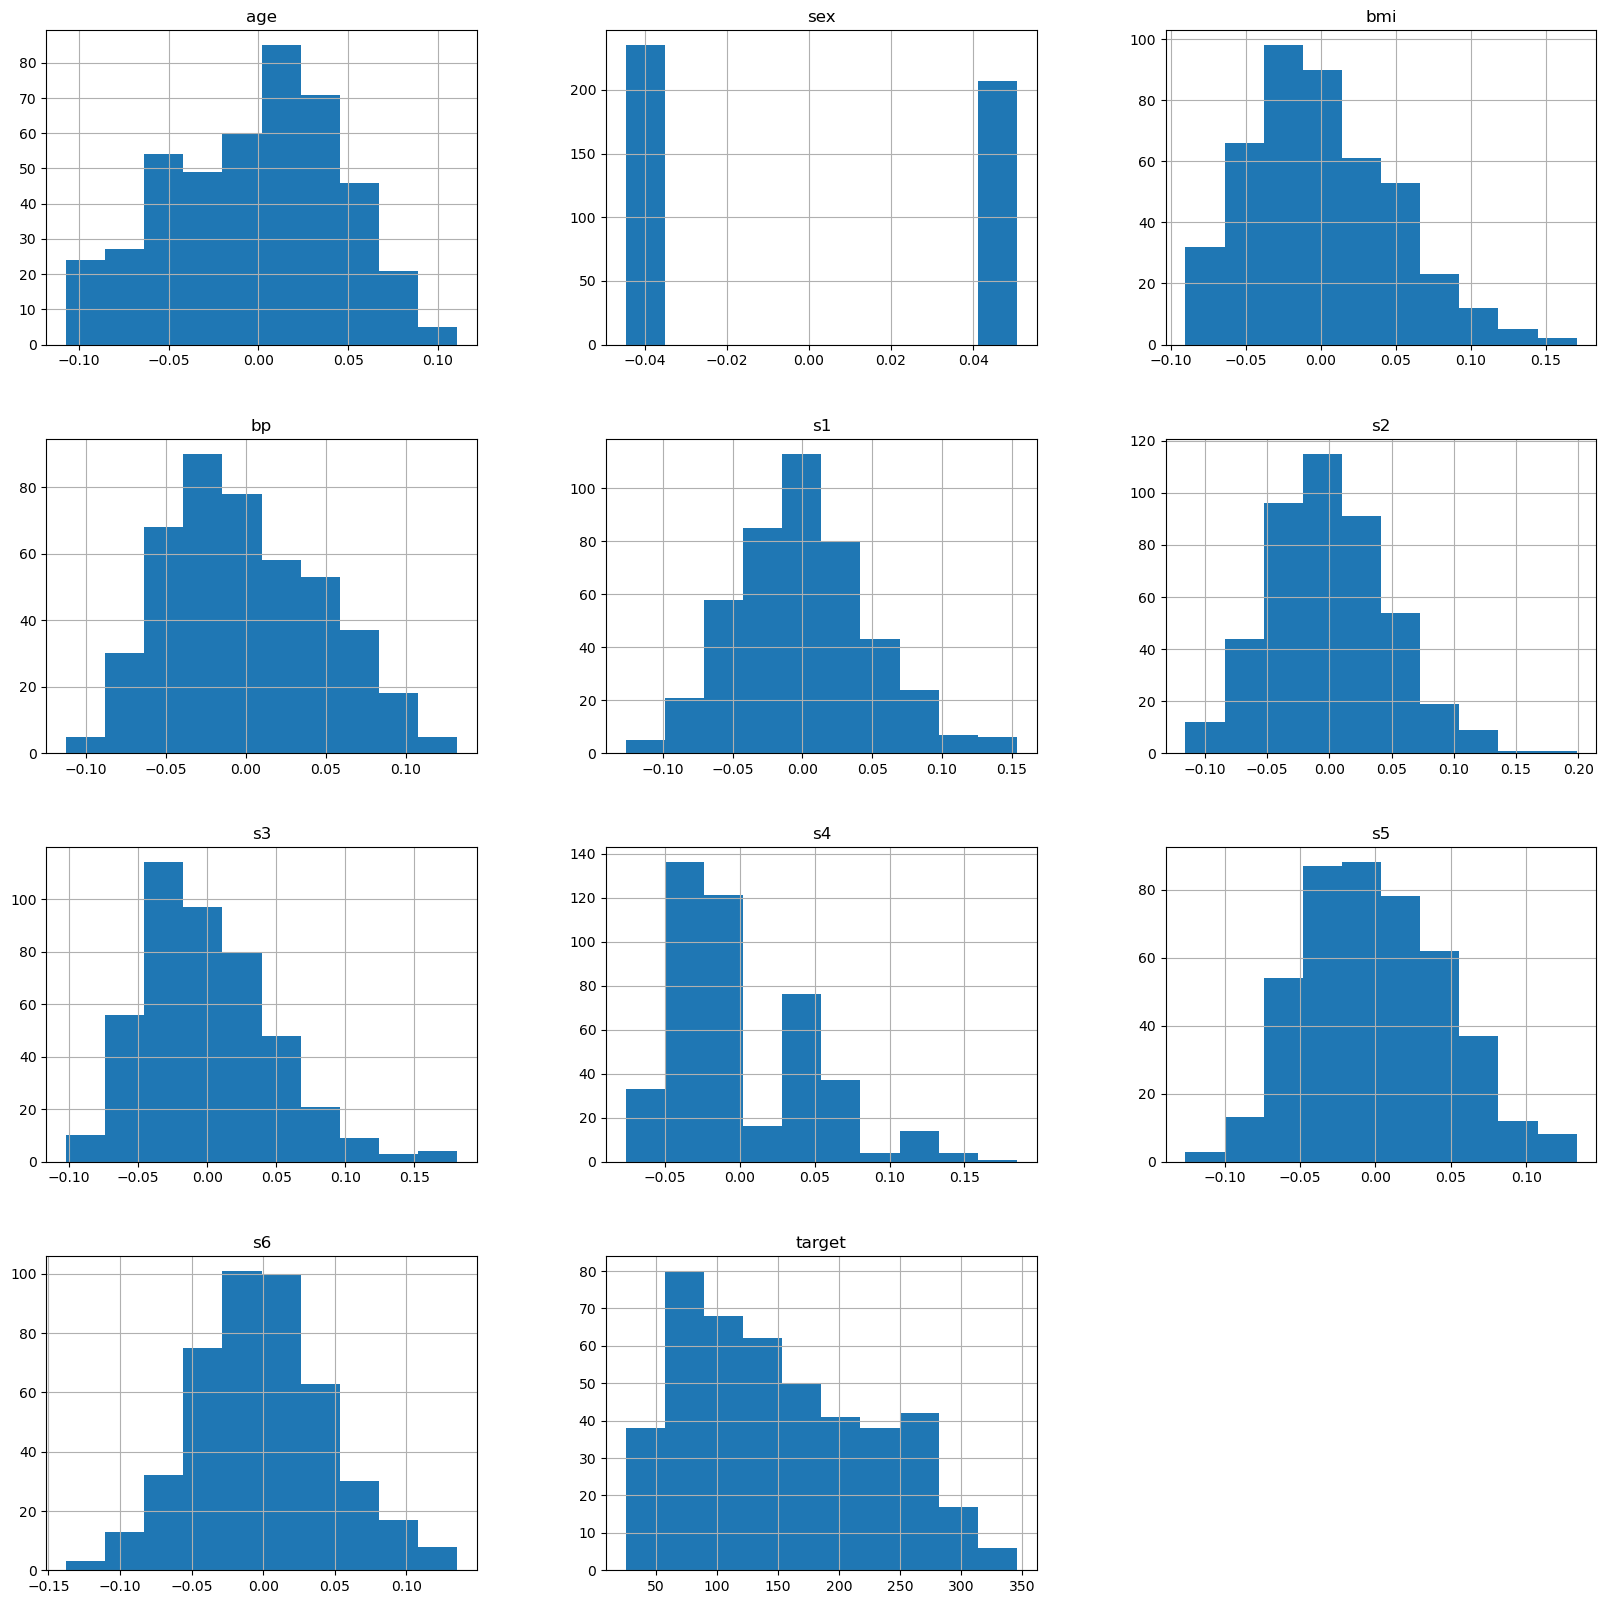

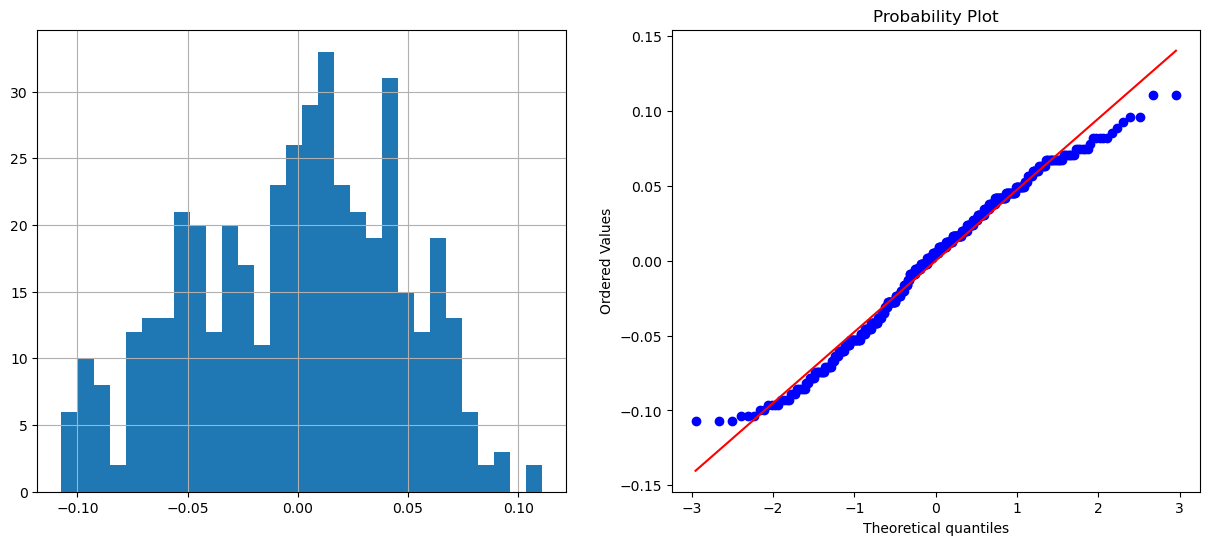

D:\Anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


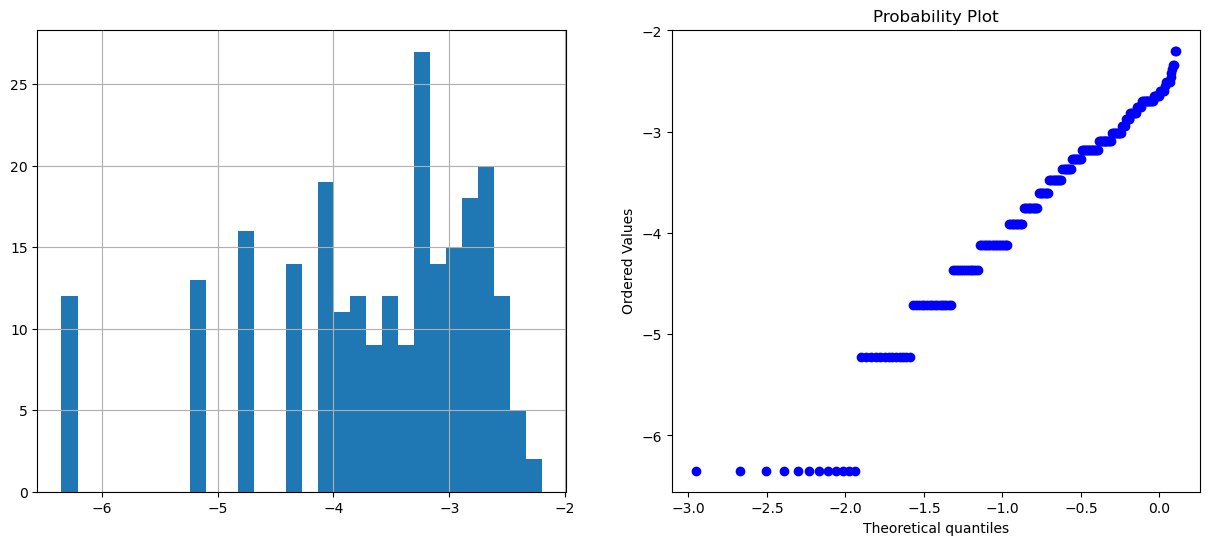

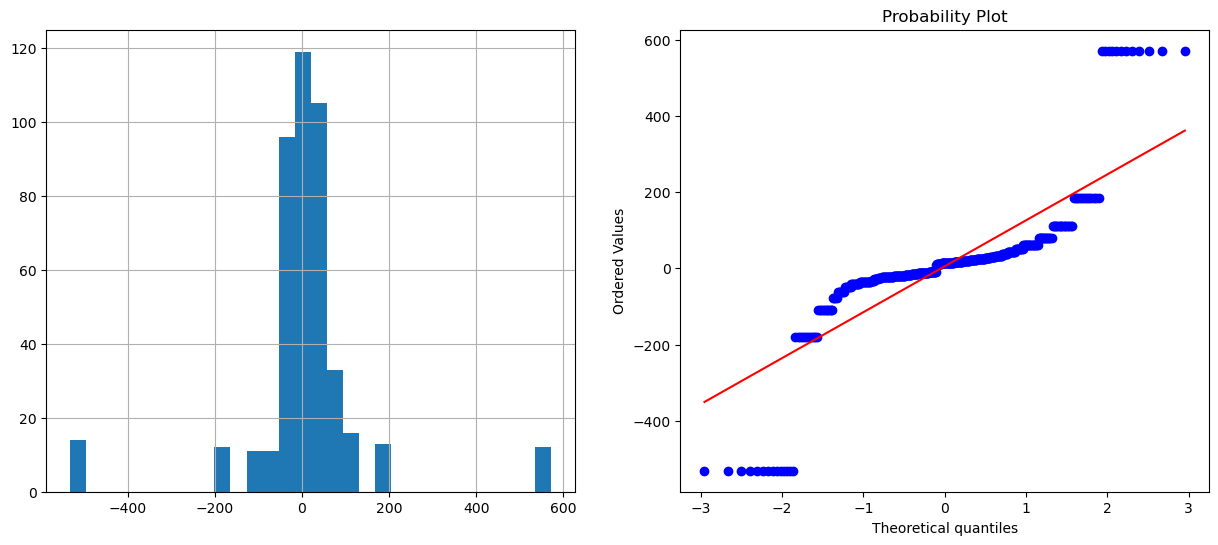

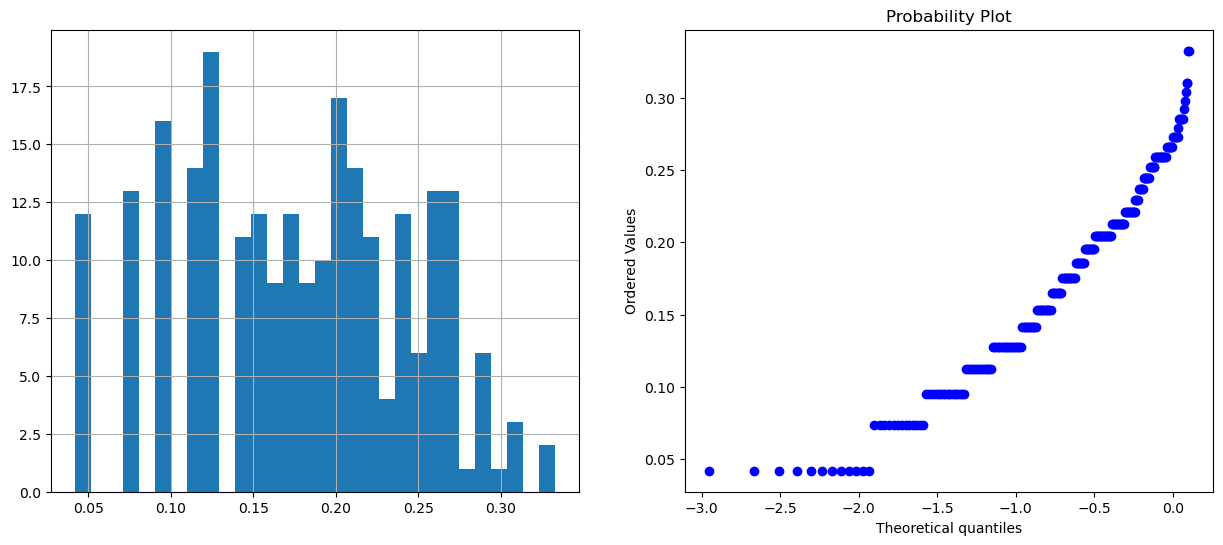

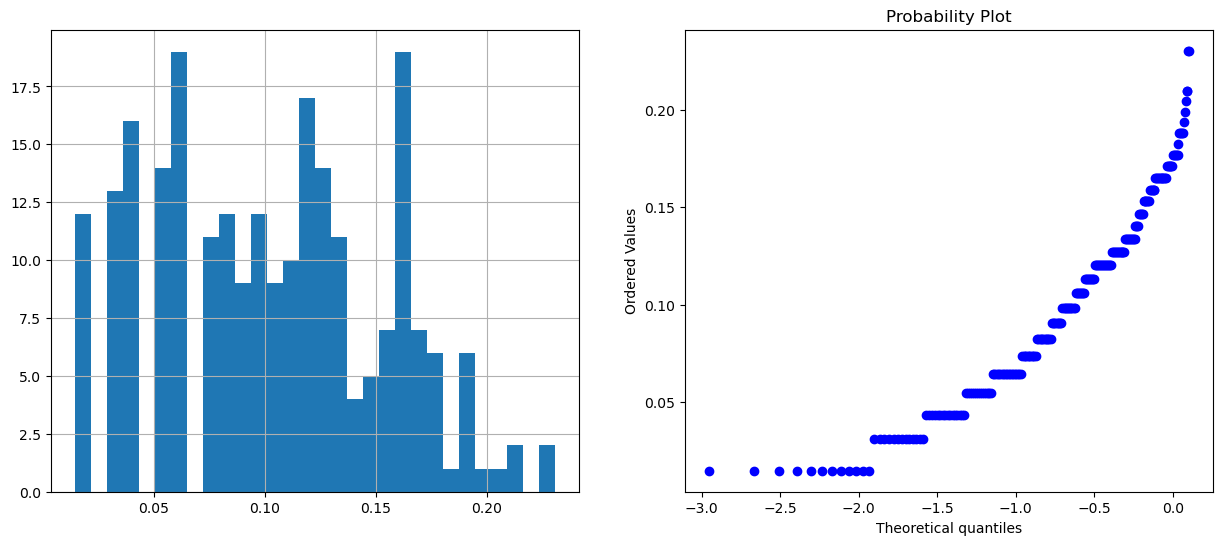

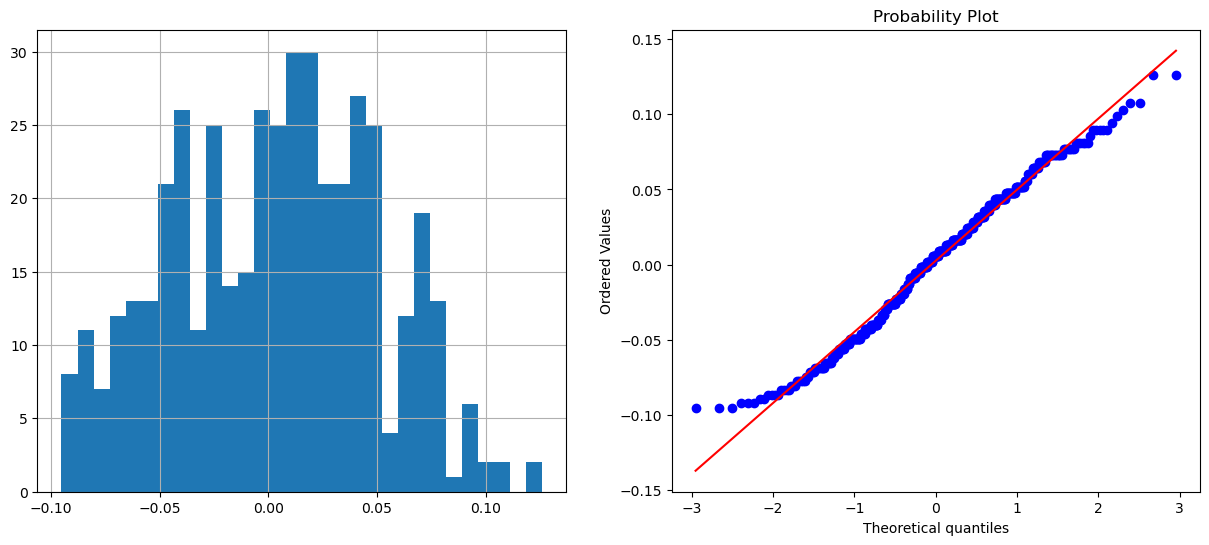

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30) 
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
feature_names = diabetes.feature_names

data = pd.DataFrame(data=X, columns=feature_names)
data['target'] = y
data.hist(figsize=(20,20))
plt.show()


diagnostic_plots(data, 'age')

# Применение логарифмического преобразования
data['age_log'] = np.log(data['age'])
diagnostic_plots(data, 'age_log')

# Применение обратного преобразования
data['age_reciprocal'] = 1 / (data['age']) 
diagnostic_plots(data, 'age_reciprocal')

# Применение квадратного корня
data['age_sqr'] = data['age']**(1/2) 
diagnostic_plots(data, 'age_sqr')

# Применение степенного преобразования
data['age_exp'] = data['age']**(1/1.5)
diagnostic_plots(data, 'age_exp')

# Использование преобразования Yeo-Johnson
pt = PowerTransformer(method='yeo-johnson', standardize=False)
data['yeojohnson'] = pt.fit_transform(data[['age']])
diagnostic_plots(data, 'yeojohnson')
